In [ ]:
# YOU MUST COPY AND RUN THE FIRST FOUR CELLS FOR THE DATA TO BE CORRECT!!! DON'T FORGET TO DO THAT.

In [115]:
# relevant imports

# base
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# data prep
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from scipy import stats

# nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

# import metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, average_precision_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, log_loss, precision_recall_curve
# !pip install seaborn
import seaborn as sn
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# uncomment !pip install commands if you get an error

In [2]:
# import feature data - make sure csv files are in the same directory
x_train = pd.read_csv("./x_train.csv")
x_val = pd.read_csv("./x_val.csv")

In [64]:
# import state data => no header, so you have to specify header=None
y_name = ["state"]
y_train = pd.read_csv("./y_train.csv", names=y_name, header=None)
y_val = pd.read_csv("./y_val.csv", names=y_name, header=None)

In [65]:
y_train['state'] = y_train['state'].astype('category')
y_val['state'] = y_val['state'].astype('category')

In [66]:
# flatten 1-column dataframe into series
y_train = y_train['state']
y_val = y_val['state']

In [5]:
# START OF MY RANDOM FOREST MODEL

In [39]:
# load scikit's random forest classifier library, initialize, and fit model with training data
# https://chrisalbon.com/machine_learning/trees_and_forests/random_forest_classifier_example/
# http://dataaspirant.com/2017/06/26/random-forest-classifier-python-scikit-learn/
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [40]:
# predictions and probabilities
predictions = clf.predict(x_val)
probabilities = clf.predict_proba(x_val)

In [41]:
# importance of each feature
list(zip(x_train, clf.feature_importances_))

[('usd_goal_real', 0.0845455801463815),
 ('duration_days', 0.05800077771718887),
 ('goal*days', 0.09404174320112699),
 ('name_word_count', 0.04995890707904218),
 ('name_sentiment', 0.024906042473223356),
 ('main_category_Art', 0.0024531314428434927),
 ('main_category_Comics', 0.003813239044605594),
 ('main_category_Crafts', 0.002008632092266688),
 ('main_category_Dance', 0.0021435337903729693),
 ('main_category_Design', 0.002780134236069755),
 ('main_category_Fashion', 0.0035757266229933847),
 ('main_category_Film & Video', 0.003573083194416246),
 ('main_category_Food', 0.0029904915422861948),
 ('main_category_Games', 0.003072443262522111),
 ('main_category_Journalism', 0.0015383101851077815),
 ('main_category_Music', 0.007230114670929523),
 ('main_category_Photography', 0.0016855555557975326),
 ('main_category_Publishing', 0.0030027223396679585),
 ('main_category_Technology', 0.004736990090627238),
 ('main_category_Theater', 0.005796082107105435),
 ('country_AT', 0.0003471179360565166

In [42]:
training_predictions = clf.predict(x_train)

In [43]:
# CLASSIFICATION METRICS
# https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
# https://medium.com/usf-msds/choosing-the-right-metric-for-evaluating-machine-learning-models-part-2-86d5649a5428

In [44]:
# training and validation accuracy
print ("Training Accuracy: ", accuracy_score(y_train, training_predictions))
print ("Validation Accuracy: ", accuracy_score(y_val, predictions))

Training Accuracy:  0.9702319037210121
Validation Accuracy:  0.6499133187608351


In [45]:
# training and validation balanced accuracy
print ("Training Balanced Accuracy: ", balanced_accuracy_score(y_train, training_predictions))
print ("Validation Balanced Accuracy: ", balanced_accuracy_score(y_val, predictions))

Training Balanced Accuracy:  0.9657305485507157
Validation Balanced Accuracy:  0.6057708525571094


In [46]:
# confusion matrix basic stats
cm = confusion_matrix(y_val, predictions)
print("Confusion matrix")
print(cm)

Confusion matrix
[[32990  6631]
 [16592 10122]]


In [47]:
# better confusion matrix depiction
pd.crosstab(y_val, predictions, rownames=['Actual Status'], colnames=['Predicted Status'])

Predicted Status,failed,successful
Actual Status,,
failed,32990,6631
successful,16592,10122


Text(0.5,1,'Confusion Matrix for Random Forest Classifier')

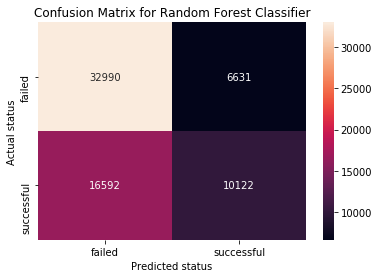

In [48]:
# best confusion matrix depiction using seaborn heatmap
class_names = y_val.unique()
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
fig = plt.figure()
heatmap = sn.heatmap(df_cm, annot=True, fmt="d")
plt.xlabel('Predicted status')
plt.ylabel('Actual status')
plt.title('Confusion Matrix for Random Forest Classifier')

In [49]:
# classification report with relevant statistics
cr = classification_report(y_val, predictions)
print(cr)

              precision    recall  f1-score   support

      failed       0.67      0.83      0.74     39621
  successful       0.60      0.38      0.47     26714

   micro avg       0.65      0.65      0.65     66335
   macro avg       0.63      0.61      0.60     66335
weighted avg       0.64      0.65      0.63     66335



In [50]:
print("Log loss: ", log_loss(y_val, probabilities))

Log loss:  1.079612936521843


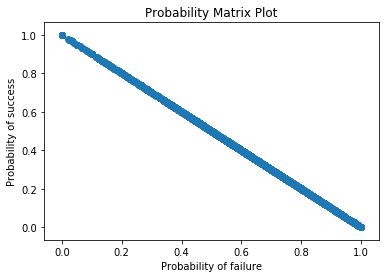

In [51]:
x, y = zip(*probabilities)
plt.scatter(x,y)
plt.title("Probability Matrix Plot")
plt.xlabel("Probability of failure")
plt.ylabel("Probability of success")
plt.show()

In [126]:
# get probabilities for the positive class (second column in probabilities)
positive_probabilities = probabilities[:,1]
# is over 0.5 - which is the standard for a no-skill model
print("ROC_AUC score: ", roc_auc_score(y_val.cat.codes, positive_probabilities))

ROC_AUC score:  0.6830401539841174


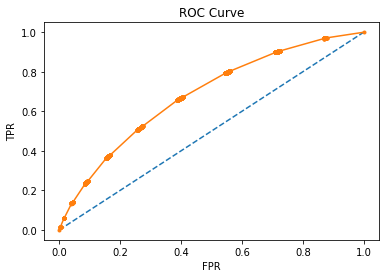

In [127]:
# our dataset is balanced - this one is better
# plot ROC curve
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
fpr, tpr, thresholds = roc_curve(y_val.cat.codes, positive_probabilities)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
# show the plot
plt.show()

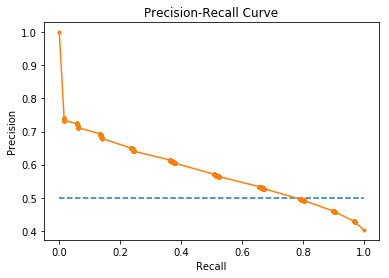

In [128]:
# plot precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_val.cat.codes, positive_probabilities)
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the roc curve for the model
plt.plot(recall, precision, marker='.')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
# show the plot
plt.show()

In [129]:
# using only these four features
# feats = ['usd_goal_real','duration_days','goal*days','name_sentiment']
# clf.fit(x_train[feats], y_train)
# predictions and probabilities
# predictions = clf.predict(x_val[feats])
# probabilities = clf.predict_proba(x_val[feats])
# training and validation accuracy
# print ("Train Accuracy: ", accuracy_score(y_train, clf.predict(x_train[feats])))
# print ("Validation Accuracy: ", accuracy_score(y_val, predictions))